## Quiz: Backpropagation

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [29]:
def plot_graph(X,Y,X_hat=None,Y_hat=None,str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None :
        plt.title(str_title,fontsize=20, pad=20)
        
    plt.plot(X,Y, ls='none', marker='o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
        
    plt.tick_params(axis='both',labelsize=14)

## Implement backpropagatin

### generate data

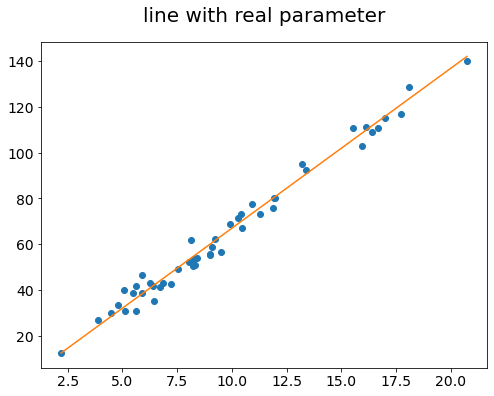

In [30]:
N = 50

x = tf.random.normal([N], 10, 5)
y = 7 * x - 3 + tf.random.normal([N], 0, 4)
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl,7*x_fl-3,str_title="line with real parameter")

In [31]:
def relu(x):
    if x > 0.0 :
        return x
    else :
        return 0.0

# y = relu(wx+b)
def MSE(x, y, w, b):
    totalError = 0
    for i in range(N):
        x_i = x[i]
        y_i = y[i]
        totalError += (y_i - relu(w * x_i + b)) ** 2
    return totalError / float(N)

## TODO

In [32]:
# backpropagation with forward propagation
def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    
    for i in range(0, N):
        x_i = x[i]
        y_i = y[i]
        
        # forward propagation
        f7 = w * x_i
        f6 = f7 + b
        f5 = relu(f6)
        f4 = (-1) * f5
        f3 = y_i + f4
        f2 = f3 ** 2
        f1 = (1/float(N)) * f2
        L_i = f1 
        
        # backpropagation
        dL_df1 = 1.0 # dL/df1 = d(f1)/df1 = 1.0
        dL_df2 = dL_df1 * (1/float(N)) # dL/df2 = (dL/df1)*(df1/df2) = (dL/df1)*(d((1/float(N))*f2)/df2) = (1/float(N))
        dL_df3 = dL_df2 * 2.0 * f3 # dL/df3 = (dL/df2)*(df2/df3) = (dL/df2)*(d(f3 ** 2)/df3) = (dL/df2)*(2*f3)
        dL_df4 = dL_df3 * 1.0 # dL/df4 = (dL/df3)*(df3/df4) = (dL/df3)*(d(y_i + f4)/df4) = (dL/df3)*1.0
        dL_df5 = dL_df4 * (-1.0) # dL/df5 = (dL/df4)*(df4/df5) = (dL/df4)*(d((-1) * f5)/df5) = (dL/df4)*(-1.0)
        if f6 > 0.0 : # dL/df6 = (dL/df5)*(df5/df6) = (dL/df5)*(d(relu(f6))/df6)
            dL_df6 = dL_df5 * 1.0 # f6>0: dL/df6 = (dL/df5)*(d(relu(f6))/df6) = (dL/df5) * 1.0
        else :
            dL_df6 = dL_df5 * 0.0 # f6<=0: dL/df6 = (dL/df5)*(d(relu(f6))/df6) = (dL/df5) * 0.0
        b_gradient += dL_df6 * 1.0 # dL/db = (dL/df6)*(df6/db) = (dL/df6)*(d(f7 + b)/db) = (dL/df6)*1.0
        dL_df7 = dL_df6 * 1.0 # dL/df7 = (dL/df6)*(df6/df7) = (dL/df6)*(d(f7 + b)/df7) = (dL/df6)*1.0
        w_gradient += dL_df7 * x_i # dL/dw = (dL/df7)*(df7/dw) = (dL/df7)*(d(w * x_i)/dw) = (dL/df7)* x_i
    return [w_gradient, b_gradient]

### Function for optimization (GD)

In [33]:
def apply_gradient(gradients, parameters, learning_rate):
    [w, b] = parameters
    [w_g, b_g] = gradients   
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    return [w, b]

def run_opt(x, y, w, b, learning_rate):
    gradients = cal_gradient(x, y, w, b)
    return apply_gradient(gradients, [w, b], learning_rate)

### Weight initialization

In [34]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

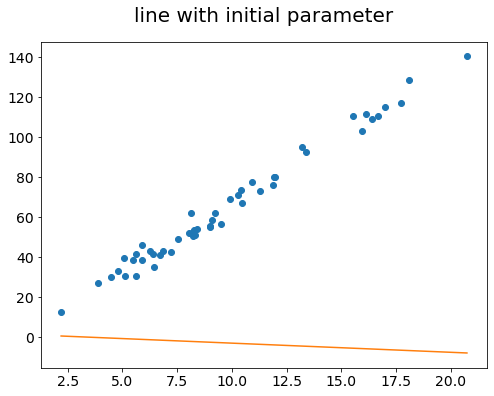

In [35]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with initial parameter")

In [36]:
learning_rate = 0.005
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new
    
    if step % display_step == 0:
        loss = MSE(x, y, w, b)
        print("step: ", step, ", loss: ", loss.numpy(), ", w: ", w.numpy(), ", b: ", b.numpy())

step:  0 , loss:  [5051.5986] , w:  [-0.45177543] , b:  [1.6963974]
step:  200 , loss:  [16.421673] , w:  [6.607305] , b:  [1.1318733]
step:  400 , loss:  [15.509237] , w:  [6.689437] , b:  [0.18389873]
step:  600 , loss:  [15.0292015] , w:  [6.749009] , b:  [-0.5036978]
step:  800 , loss:  [14.776646] , w:  [6.792219] , b:  [-1.0024338]
step:  1000 , loss:  [14.64378] , w:  [6.8235607] , b:  [-1.3641832]
step:  1200 , loss:  [14.573879] , w:  [6.8462934] , b:  [-1.6265718]
step:  1400 , loss:  [14.537093] , w:  [6.8627825] , b:  [-1.8168902]
step:  1600 , loss:  [14.517752] , w:  [6.8747425] , b:  [-1.954935]
step:  1800 , loss:  [14.507573] , w:  [6.8834176] , b:  [-2.055062]


### Check trained parameters 

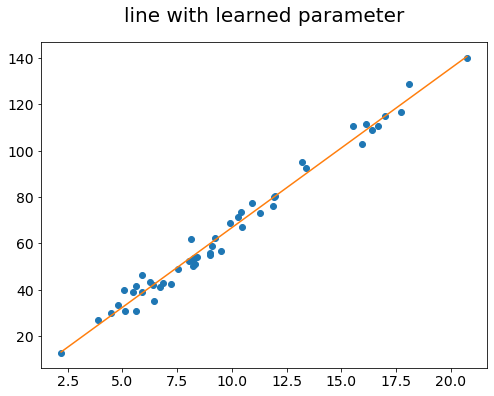

In [37]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with learned parameter")